##Assignment 3: <font color='3C6E71'></font>


####Total Points: 5 points)
\

----
**Objective:**

In this assignment, you will work with time series data, applying data wrangling techniques including merging and concatenation, and performing time-based analysis using Python libraries: Pandas, NumPy, and Matplotlib/Seaborn.

----

## **Instructions:**

### **1. Data Collection:**
- Find or download a time series dataset from a public source. Examples could include stock prices, weather data, COVID-19 cases, or energy consumption over time.
- Make sure the dataset includes a time or date column to analyze time-based trends.

### **2. Data Wrangling (Merging and Concatenation):**
- Split your dataset into two or more parts (e.g., by year, location, or category).
- Concatenation: Concatenate the parts back together and verify that the data structure remains consistent.
- Merging: Locate an additional dataset related to your main dataset and merge it to enrich the original data. For example, if analyzing stock prices, you might merge in economic indicators.

### **3. Data Cleaning and Preparation:**

- Clean the dataset by handling missing values, removing duplicates, and converting data types where necessary.
- Standardize the time format (if required) and set it as the index of your DataFrame.

### **4. Time Series Analysis:**
- Perform time-based resampling (e.g., monthly or quarterly aggregation) and calculate summary statistics for each period.
- Identify trends, seasonal patterns, or cycles within the time series data.
- Calculate rolling statistics (e.g., moving average) to smooth out noise and highlight trends.

### **5. Data Visualization:**
- Create at least five visualizations that showcase trends, patterns, or relationships in the time series data.
- Examples include line plots, seasonal decomposition plots, rolling statistics visualizations, and heatmaps.
- Label the visualizations clearly and provide meaningful insights.

### **6. Comment Your Code:**

- Comment on each section of your code, explaining each step and the rationale behind your approach.

---


In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [115]:
df = pd.read_csv('anime.csv')
df.head()

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.10,2037075,finished_airing,64.0,2009-04-05,2010-07-04,manga,...,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,NaN,https://cdn.myanimelist.net/images/anime/1208/...,https://myanimelist.net/anime/5114/Fullmetal_A...,https://www.youtube.com/watch?v=--IcmZkvL0Q,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),tv,9.04,1671587,finished_airing,148.0,2011-10-02,2014-09-24,manga,...,"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],Hunters devote themselves to accomplishing haz...,NaN,https://cdn.myanimelist.net/images/anime/1337/...,https://myanimelist.net/anime/11061/Hunter_x_H...,https://www.youtube.com/watch?v=D9iTQRB4XRk,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.05,1491491,finished_airing,10.0,2019-04-29,2019-07-01,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
3,9253,Steins;Gate,tv,9.07,1348232,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,...,"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' vi...,https://cdn.myanimelist.net/images/anime/1935/...,https://myanimelist.net/anime/9253/Steins_Gate,https://www.youtube.com/watch?v=27OZc-ku6is,Steins;Gate,STEINS;GATE,[]
4,28851,Koe no Katachi,movie,8.94,1540277,finished_airing,1.0,2016-09-17,2016-09-17,manga,...,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","As a wild youth, elementary school student Sho...",Koe no Katachi won the following awards: Japan...,https://cdn.myanimelist.net/images/anime/1122/...,https://myanimelist.net/anime/28851/Koe_no_Kat...,https://www.youtube.com/watch?v=XBNWo25izJ8,A Silent Voice,聲の形,['The Shape of Voice']


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   anime_id          24985 non-null  int64  
 1   title             24985 non-null  object 
 2   type              24927 non-null  object 
 3   score             16050 non-null  float64
 4   scored_by         24985 non-null  int64  
 5   status            24985 non-null  object 
 6   episodes          24438 non-null  float64
 7   start_date        24110 non-null  object 
 8   end_date          22215 non-null  object 
 9   source            21424 non-null  object 
 10  members           24985 non-null  int64  
 11  favorites         24985 non-null  int64  
 12  episode_duration  24387 non-null  object 
 13  total_duration    24162 non-null  object 
 14  rating            24405 non-null  object 
 15  sfw               24985 non-null  bool   
 16  approved          24985 non-null  bool  

In [117]:
# Check for missing values and handle them (fill or drop)
df.isnull().sum()

anime_id                0
title                   0
type                   58
score                8935
scored_by               0
status                  0
episodes              547
start_date            875
end_date             2770
source               3561
members                 0
favorites               0
episode_duration      598
total_duration        823
rating                580
sfw                     0
approved                0
created_at              0
updated_at              0
start_year           4684
start_season         4684
real_start_date       875
real_end_date        2770
broadcast_day       21535
broadcast_time      21672
genres                  0
themes                  0
demographics            0
studios                 0
producers               0
licensors               0
synopsis             4493
background          22535
main_picture          154
url                     0
trailer_url         20261
title_english       14583
title_japanese         90
title_synony

In [118]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with missing 'start_date' values
df = df.dropna(subset=['start_date'])

# Split dataset into two groups: before 2000 and from 2000 onwards
df_before_2000 = df[df['start_date'].dt.year < 2000]
df_2000_and_later = df[df['start_date'].dt.year >= 2000]

In [119]:
df_before_2000.head()

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
11,21,One Piece,tv,8.70,1248354,currently_airing,NaN,1999-10-20,NaN,manga,...,"['Fuji TV', 'TAP', 'Shueisha']","['Funimation', '4Kids Entertainment']",Barely surviving in a barrel after passing thr...,Several anime-original arcs have been adapted ...,https://cdn.myanimelist.net/images/anime/6/732...,https://myanimelist.net/anime/21/One_Piece,https://www.youtube.com/watch?v=l_98K4_6UQ0,One Piece,ONE PIECE,['OP']
17,1,Cowboy Bebop,tv,8.75,923377,finished_airing,26.0,1998-04-03,1999-04-24,original,...,['Bandai Visual'],"['Funimation', 'Bandai Entertainment']","Crime is timeless. By the year 2071, humanity ...",When Cowboy Bebop first aired in spring of 199...,https://cdn.myanimelist.net/images/anime/4/196...,https://myanimelist.net/anime/1/Cowboy_Bebop,https://www.youtube.com/watch?v=qig4KOK2R2g,Cowboy Bebop,カウボーイビバップ,[]
30,164,Mononoke Hime,movie,8.67,776491,finished_airing,1.0,1997-07-12,1997-07-12,original,...,"['Tokuma Shoten', 'Nippon Television Network']",['GKIDS'],When an Emishi village is attacked by a fierce...,"In 1997 the film won Best Japanese Movie, Best...",https://cdn.myanimelist.net/images/anime/7/759...,https://myanimelist.net/anime/164/Mononoke_Hime,https://www.youtube.com/watch?v=4OiMOHRDs14,Princess Mononoke,もののけ姫,['Mononoke Hime']
46,32,Neon Genesis Evangelion: The End of Evangelion,movie,8.55,593685,finished_airing,1.0,1997-07-19,1997-07-19,original,...,"['TV Tokyo', 'Toei Animation', 'Kadokawa Shote...","['GKIDS', 'Manga Entertainment']",Shinji Ikari is left emotionally comatose afte...,Shinseiki Evangelion Gekijouban: The End of Ev...,https://cdn.myanimelist.net/images/anime/1404/...,https://myanimelist.net/anime/32/Neon_Genesis_...,https://www.youtube.com/watch?v=Gk72E4qgEng,Neon Genesis Evangelion: The End of Evangelion,新世紀エヴァンゲリオン劇場版 THE END OF EVANGELION,['Shinseiki Evangelion Gekijouban: The End of ...
49,30,Neon Genesis Evangelion,tv,8.35,1036816,finished_airing,26.0,1995-10-04,1996-03-27,original,...,"['TV Tokyo', 'Kadokawa Shoten', 'Nihon Ad Syst...","['ADV Films', 'GKIDS']",Fifteen years after a cataclysmic event known ...,Director Hideaki Anno's depression is what led...,https://cdn.myanimelist.net/images/anime/1314/...,https://myanimelist.net/anime/30/Neon_Genesis_...,NaN,Neon Genesis Evangelion,新世紀エヴァンゲリオン,['Shinseiki Evangelion']


In [120]:
df_2000_and_later.head()

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.10,2037075,finished_airing,64.0,2009-04-05,2010-07-04,manga,...,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,NaN,https://cdn.myanimelist.net/images/anime/1208/...,https://myanimelist.net/anime/5114/Fullmetal_A...,https://www.youtube.com/watch?v=--IcmZkvL0Q,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),tv,9.04,1671587,finished_airing,148.0,2011-10-02,2014-09-24,manga,...,"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],Hunters devote themselves to accomplishing haz...,NaN,https://cdn.myanimelist.net/images/anime/1337/...,https://myanimelist.net/anime/11061/Hunter_x_H...,https://www.youtube.com/watch?v=D9iTQRB4XRk,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.05,1491491,finished_airing,10.0,2019-04-29,2019-07-01,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
3,9253,Steins;Gate,tv,9.07,1348232,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,...,"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' vi...,https://cdn.myanimelist.net/images/anime/1935/...,https://myanimelist.net/anime/9253/Steins_Gate,https://www.youtube.com/watch?v=27OZc-ku6is,Steins;Gate,STEINS;GATE,[]
4,28851,Koe no Katachi,movie,8.94,1540277,finished_airing,1.0,2016-09-17,2016-09-17,manga,...,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","As a wild youth, elementary school student Sho...",Koe no Katachi won the following awards: Japan...,https://cdn.myanimelist.net/images/anime/1122/...,https://myanimelist.net/anime/28851/Koe_no_Kat...,https://www.youtube.com/watch?v=XBNWo25izJ8,A Silent Voice,聲の形,['The Shape of Voice']


In [123]:
df_concat = pd.concat([df_before_2000, df_2000_and_later])
df_concat

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
11,21,One Piece,tv,8.70,1248354,currently_airing,NaN,1999-10-20,NaN,manga,...,"['Fuji TV', 'TAP', 'Shueisha']","['Funimation', '4Kids Entertainment']",Barely surviving in a barrel after passing thr...,Several anime-original arcs have been adapted ...,https://cdn.myanimelist.net/images/anime/6/732...,https://myanimelist.net/anime/21/One_Piece,https://www.youtube.com/watch?v=l_98K4_6UQ0,One Piece,ONE PIECE,['OP']
17,1,Cowboy Bebop,tv,8.75,923377,finished_airing,26.0,1998-04-03,1999-04-24,original,...,['Bandai Visual'],"['Funimation', 'Bandai Entertainment']","Crime is timeless. By the year 2071, humanity ...",When Cowboy Bebop first aired in spring of 199...,https://cdn.myanimelist.net/images/anime/4/196...,https://myanimelist.net/anime/1/Cowboy_Bebop,https://www.youtube.com/watch?v=qig4KOK2R2g,Cowboy Bebop,カウボーイビバップ,[]
30,164,Mononoke Hime,movie,8.67,776491,finished_airing,1.0,1997-07-12,1997-07-12,original,...,"['Tokuma Shoten', 'Nippon Television Network']",['GKIDS'],When an Emishi village is attacked by a fierce...,"In 1997 the film won Best Japanese Movie, Best...",https://cdn.myanimelist.net/images/anime/7/759...,https://myanimelist.net/anime/164/Mononoke_Hime,https://www.youtube.com/watch?v=4OiMOHRDs14,Princess Mononoke,もののけ姫,['Mononoke Hime']
46,32,Neon Genesis Evangelion: The End of Evangelion,movie,8.55,593685,finished_airing,1.0,1997-07-19,1997-07-19,original,...,"['TV Tokyo', 'Toei Animation', 'Kadokawa Shote...","['GKIDS', 'Manga Entertainment']",Shinji Ikari is left emotionally comatose afte...,Shinseiki Evangelion Gekijouban: The End of Ev...,https://cdn.myanimelist.net/images/anime/1404/...,https://myanimelist.net/anime/32/Neon_Genesis_...,https://www.youtube.com/watch?v=Gk72E4qgEng,Neon Genesis Evangelion: The End of Evangelion,新世紀エヴァンゲリオン劇場版 THE END OF EVANGELION,['Shinseiki Evangelion Gekijouban: The End of ...
49,30,Neon Genesis Evangelion,tv,8.35,1036816,finished_airing,26.0,1995-10-04,1996-03-27,original,...,"['TV Tokyo', 'Kadokawa Shoten', 'Nihon Ad Syst...","['ADV Films', 'GKIDS']",Fifteen years after a cataclysmic event known ...,Director Hideaki Anno's depression is what led...,https://cdn.myanimelist.net/images/anime/1314/...,https://myanimelist.net/anime/30/Neon_Genesis_...,NaN,Neon Genesis Evangelion,新世紀エヴァンゲリオン,['Shinseiki Evangelion']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,56144,Jijia Yingxiong Movie: Wo Yu Wo Dengyu Wuxian Da,movie,NaN,1,finished_airing,1.0,2023-08-04,2023-08-04,game,...,['Stay Luck'],[],NaN,NaN,https://cdn.myanimelist.net/images/anime/1419/...,https://myanimelist.net/anime/56144/Jijia_Ying...,https://www.youtube.com/watch?v=t3pQv7qMgug,NaN,機甲英雄劇場版 我與我等於無限大,['Hero of Robots Movie']
24979,56169,Tettou,music,NaN,6,finished_airing,1.0,2019-10-01,2019-10-01,original,...,['NHK'],[],Music video for the song Tettou by Asaco Nasu ...,NaN,https://cdn.myanimelist.net/images/anime/1918/...,https://myanimelist.net/anime/56169/Tettou,NaN,NaN,鉄塔,['Minna no Uta']
24982,56107,Kaijuu Sekai Seifuku,ona,NaN,2,currently_airing,NaN,2020-04-02,NaN,web_manga,...,[],[],Follows four dragon-like monsters who came to ...,NaN,https://cdn.myanimelist.net/images/anime/1859/...,https://myanimelist.net/anime/56107/Kaijuu_Sek...,NaN,NaN,かいじゅうせかいせいふく,[]
24983,56168,Yotsukado no Melody,music,NaN,1,finished_airing,1.0,2014-12-01,2014-12-01,original,...,['NHK'],[],Music video for the song Yotsukado no Melody b...,NaN,https://cdn.myanimelist.net/images/anime/1559/...,https://myanimelist.net/anime/56168/Yotsukado_...,NaN,NaN,四つ角のメロディー,['Minna no Uta']


In [126]:
df2 = pd.read_csv('AnimeList.csv')
df2[df2['title'] == 'One Piece']

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
34,21,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,...,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ..."


In [129]:
print(len(df2))
df2[df2['anime_id'] == 11013]

14478


,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."


In [130]:
print(len(df))
df[df['anime_id'] == 11013]

24110


,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
976,11013,Inu x Boku SS,tv,7.38,231579,finished_airing,12.0,2012-01-13,2012-03-30,manga,...,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...",['Sentai Filmworks'],Ririchiyo Shirakiin is the sheltered daughter ...,Inu x Boku SS was licensed by Sentai Filmworks...,https://cdn.myanimelist.net/images/anime/1760/...,https://myanimelist.net/anime/11013/Inu_x_Boku_SS,NaN,Inu X Boku Secret Service,妖狐×僕SS,['Youko x Boku SS']


In [132]:
df_merged = pd.merge(df, df2, on='anime_id', how='outer')
df_merged.head()

,anime_id,title_x,type_x,score_x,scored_by_x,status_x,episodes_x,start_date,end_date,source_x,...,background_y,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,1,Cowboy Bebop,tv,8.75,923377.0,finished_airing,26.0,1998-04-03,1999-04-24,original,...,When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga...",Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","['""Tank!"" by The Seatbelts (eps 1-25)']","['#1: ""The Real Folk Blues"" by The Seatbelts f..."
1,5,Cowboy Bebop: Tengoku no Tobira,movie,8.38,207777.0,finished_airing,1.0,2001-09-01,2001-09-01,original,...,NaN,NaN,NaN,"{'Parent story': [{'mal_id': 1, 'type': 'anime...","Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,"Action, Space, Drama, Mystery, Sci-Fi","['""Ask DNA"" by The Seatbelts featuring Raju Ra...","['""Gotta Knock a Little Harder"" by The Seatbel..."
2,6,Trigun,tv,8.22,359862.0,finished_airing,26.0,1998-04-01,1998-09-30,manga,...,The Japanese release by Victor Entertainment h...,Spring 1998,Thursdays at 01:15 (JST),"{'Adaptation': [{'mal_id': 703, 'type': 'manga...",Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","['""H.T."" by Tsuneo Imahori']","['""Kaze wa Mirai ni Fuku (The Wind Blows to th..."
3,7,Witch Hunter Robin,tv,7.25,43038.0,finished_airing,26.0,2002-07-03,2002-12-25,original,...,NaN,Summer 2002,Tuesdays at Unknown,[],Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,"Action, Magic, Police, Supernatural, Drama, My...","['""Shell"" by Bana']","['#1: ""Half Pain"" by Bana (eps 01-14,16-25)', ..."
4,8,Bouken Ou Beet,tv,6.94,6445.0,finished_airing,52.0,2004-09-30,2005-09-29,manga,...,NaN,Fall 2004,Unknown,"{'Adaptation': [{'mal_id': 1348, 'type': 'mang...",NaN,NaN,Toei Animation,"Adventure, Fantasy, Shounen, Supernatural","['#1: ""Emotion"" by Sunbrain', '#2: ""Wish Men"" ...","['#1: ""pureness"" by Nana Kitade (eps 1-13)', '..."


In [133]:
len(df['anime_id'].unique())

24110

In [134]:
len(df2['anime_id'].unique())

14478

In [137]:
len(df_merged['anime_id'].unique())

24324

In [139]:
# Step 3: 
df_cleaned = df.copy()
df_cleaned.head()

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.10,2037075,finished_airing,64.0,2009-04-05,2010-07-04,manga,...,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,NaN,https://cdn.myanimelist.net/images/anime/1208/...,https://myanimelist.net/anime/5114/Fullmetal_A...,https://www.youtube.com/watch?v=--IcmZkvL0Q,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),tv,9.04,1671587,finished_airing,148.0,2011-10-02,2014-09-24,manga,...,"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],Hunters devote themselves to accomplishing haz...,NaN,https://cdn.myanimelist.net/images/anime/1337/...,https://myanimelist.net/anime/11061/Hunter_x_H...,https://www.youtube.com/watch?v=D9iTQRB4XRk,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.05,1491491,finished_airing,10.0,2019-04-29,2019-07-01,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
3,9253,Steins;Gate,tv,9.07,1348232,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,...,"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' vi...,https://cdn.myanimelist.net/images/anime/1935/...,https://myanimelist.net/anime/9253/Steins_Gate,https://www.youtube.com/watch?v=27OZc-ku6is,Steins;Gate,STEINS;GATE,[]
4,28851,Koe no Katachi,movie,8.94,1540277,finished_airing,1.0,2016-09-17,2016-09-17,manga,...,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","As a wild youth, elementary school student Sho...",Koe no Katachi won the following awards: Japan...,https://cdn.myanimelist.net/images/anime/1122/...,https://myanimelist.net/anime/28851/Koe_no_Kat...,https://www.youtube.com/watch?v=XBNWo25izJ8,A Silent Voice,聲の形,['The Shape of Voice']


In [143]:
df_cleaned.isnull().sum()

anime_id                0
title                   0
type                    5
score                8072
scored_by               0
status                  0
episodes              372
start_date              0
end_date             1897
source               3484
members                 0
favorites               0
episode_duration      375
total_duration        595
rating                455
sfw                     0
approved                0
created_at              0
updated_at              0
start_year           3809
start_season         3809
real_start_date         0
real_end_date        1897
broadcast_day       20661
broadcast_time      20798
genres                  0
themes                  0
demographics            0
studios                 0
producers               0
licensors               0
synopsis             3884
background          21681
main_picture          137
url                     0
trailer_url         19477
title_english       13829
title_japanese         84
title_synony

In [145]:
df_cleaned['score']

0        9.10
1        9.04
2        9.05
3        9.07
4        8.94
         ... 
24980     NaN
24981     NaN
24982     NaN
24983     NaN
24984     NaN
Name: score, Length: 24110, dtype: float64

In [147]:
df_cleaned.columns

Index(['anime_id', 'title', 'type', 'score', 'scored_by', 'status', 'episodes',
       'start_date', 'end_date', 'source', 'members', 'favorites',
       'episode_duration', 'total_duration', 'rating', 'sfw', 'approved',
       'created_at', 'updated_at', 'start_year', 'start_season',
       'real_start_date', 'real_end_date', 'broadcast_day', 'broadcast_time',
       'genres', 'themes', 'demographics', 'studios', 'producers', 'licensors',
       'synopsis', 'background', 'main_picture', 'url', 'trailer_url',
       'title_english', 'title_japanese', 'title_synonyms'],
      dtype='object')

In [148]:
# Fill missing values for numerical columns with 0
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(0)
df_cleaned.head()

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.10,2037075,finished_airing,64.0,2009-04-05,2010-07-04,manga,...,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,NaN,https://cdn.myanimelist.net/images/anime/1208/...,https://myanimelist.net/anime/5114/Fullmetal_A...,https://www.youtube.com/watch?v=--IcmZkvL0Q,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),tv,9.04,1671587,finished_airing,148.0,2011-10-02,2014-09-24,manga,...,"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],Hunters devote themselves to accomplishing haz...,NaN,https://cdn.myanimelist.net/images/anime/1337/...,https://myanimelist.net/anime/11061/Hunter_x_H...,https://www.youtube.com/watch?v=D9iTQRB4XRk,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.05,1491491,finished_airing,10.0,2019-04-29,2019-07-01,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
3,9253,Steins;Gate,tv,9.07,1348232,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,...,"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' vi...,https://cdn.myanimelist.net/images/anime/1935/...,https://myanimelist.net/anime/9253/Steins_Gate,https://www.youtube.com/watch?v=27OZc-ku6is,Steins;Gate,STEINS;GATE,[]
4,28851,Koe no Katachi,movie,8.94,1540277,finished_airing,1.0,2016-09-17,2016-09-17,manga,...,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","As a wild youth, elementary school student Sho...",Koe no Katachi won the following awards: Japan...,https://cdn.myanimelist.net/images/anime/1122/...,https://myanimelist.net/anime/28851/Koe_no_Kat...,https://www.youtube.com/watch?v=XBNWo25izJ8,A Silent Voice,聲の形,['The Shape of Voice']


In [153]:
# Fill missing values for categorical/text columns with an empty string or "Unknown"
text_columns = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[text_columns] = df_cleaned[text_columns].fillna("Unknown")
df_cleaned.head()

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.10,2037075,finished_airing,64.0,2009-04-05,2010-07-04,manga,...,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,Unknown,https://cdn.myanimelist.net/images/anime/1208/...,https://myanimelist.net/anime/5114/Fullmetal_A...,https://www.youtube.com/watch?v=--IcmZkvL0Q,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),tv,9.04,1671587,finished_airing,148.0,2011-10-02,2014-09-24,manga,...,"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],Hunters devote themselves to accomplishing haz...,Unknown,https://cdn.myanimelist.net/images/anime/1337/...,https://myanimelist.net/anime/11061/Hunter_x_H...,https://www.youtube.com/watch?v=D9iTQRB4XRk,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.05,1491491,finished_airing,10.0,2019-04-29,2019-07-01,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
3,9253,Steins;Gate,tv,9.07,1348232,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,...,"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' vi...,https://cdn.myanimelist.net/images/anime/1935/...,https://myanimelist.net/anime/9253/Steins_Gate,https://www.youtube.com/watch?v=27OZc-ku6is,Steins;Gate,STEINS;GATE,[]
4,28851,Koe no Katachi,movie,8.94,1540277,finished_airing,1.0,2016-09-17,2016-09-17,manga,...,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","As a wild youth, elementary school student Sho...",Koe no Katachi won the following awards: Japan...,https://cdn.myanimelist.net/images/anime/1122/...,https://myanimelist.net/anime/28851/Koe_no_Kat...,https://www.youtube.com/watch?v=XBNWo25izJ8,A Silent Voice,聲の形,['The Shape of Voice']


In [187]:
# Step 2: Convert Data Types
df_cleaned['year_category'] = ['Before 2000' if year < 2000 else '2000 and Later' for year in df_cleaned['start_year']]
df_cleaned = df_cleaned[df_cleaned['genres'] != '[]']

df_cleaned['start_date'] = pd.to_datetime(df_cleaned['start_date'], errors='coerce')
df_cleaned['end_date'] = pd.to_datetime(df_cleaned['end_date'], errors='coerce')
df_cleaned['end_date'] = df_cleaned['end_date'].fillna(datetime.today())
df_cleaned.isnull().sum()

anime_id            0
title               0
type                0
score               0
scored_by           0
status              0
episodes            0
start_date          0
end_date            0
source              0
members             0
favorites           0
episode_duration    0
total_duration      0
rating              0
sfw                 0
approved            0
created_at          0
updated_at          0
start_year          0
start_season        0
real_start_date     0
real_end_date       0
broadcast_day       0
broadcast_time      0
genres              0
themes              0
demographics        0
studios             0
producers           0
licensors           0
synopsis            0
background          0
main_picture        0
url                 0
trailer_url         0
title_english       0
title_japanese      0
title_synonyms      0
year_category       0
dtype: int64

In [157]:
df_cleaned['start_year'] = df_cleaned['start_date'].dt.year
anime_per_year = df_cleaned[df_cleaned['start_year'] != 0.0].groupby('start_year').size()
# Display the count of anime created each year
print("Anime Created per Year:")
anime_per_year

Anime Created per Year:


start_year
1917      17
1918       9
1924       5
1925       9
1926       6
        ... 
2021    1102
2022    1038
2023     649
2024      83
2025       5
Length: 104, dtype: int64

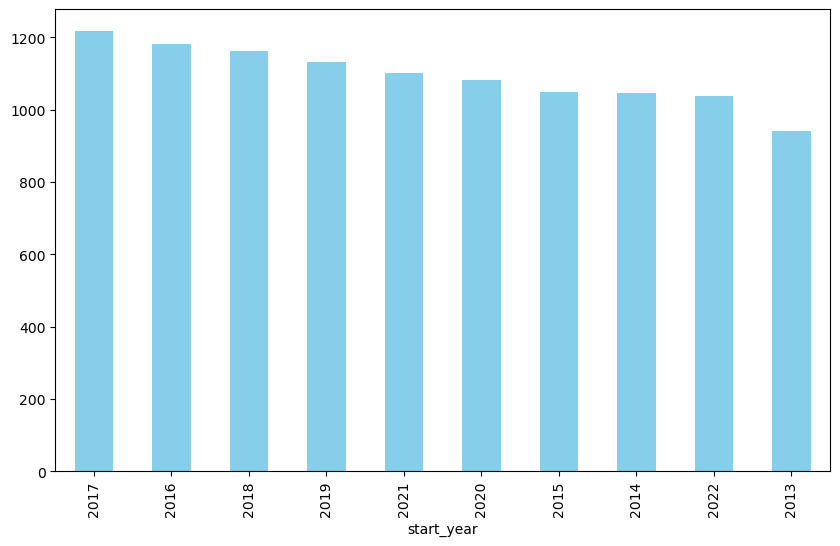

In [243]:
# Visualization 1: Top 10 Most Popular Anime Titles by Members
plt.figure(figsize=(10, 6))
anime_per_year.nlargest(10).plot(kind='bar', color='skyblue')
plt.show()

<Figure size 1000x600 with 0 Axes>

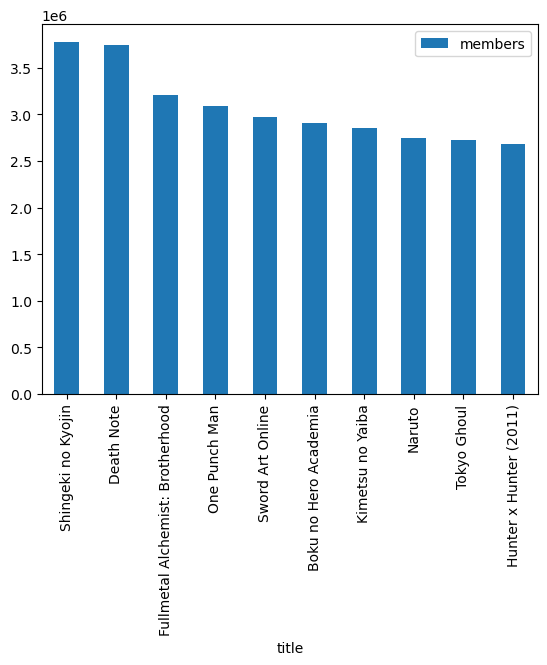

In [257]:
top_animes = df_cleaned.nlargest(10, 'members')[['title', 'members']].set_inde

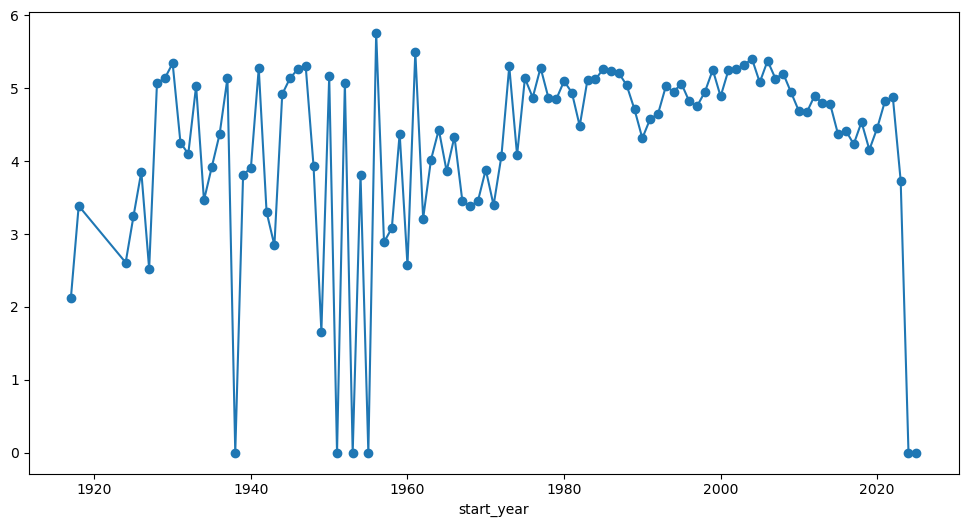

In [247]:
# Visualization 3: Average Anime Score by Year
anime_score_year = df_cleaned.groupby('start_year')['score'].mean().dropna()
plt.figure(figsize=(12, 6))
anime_score_year.plot(kind='line', marker='o')
plt.show()

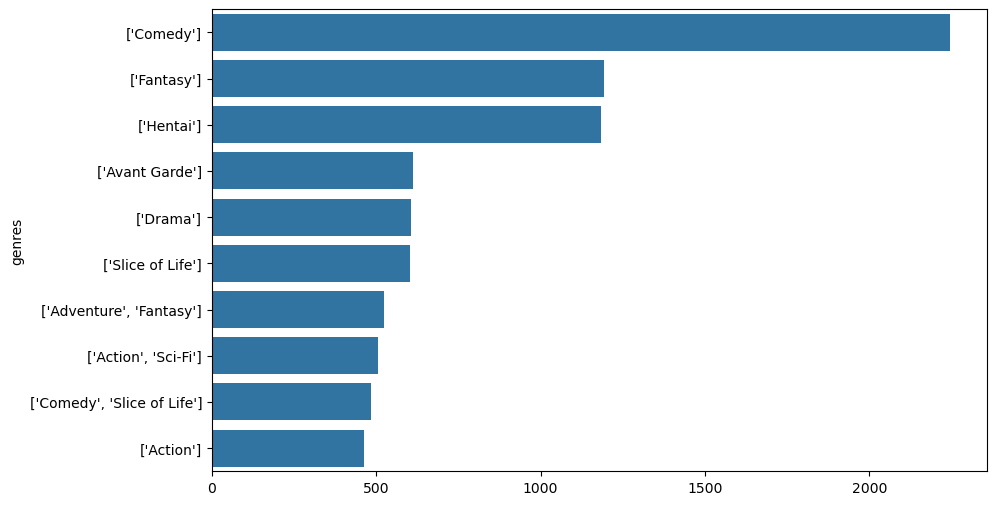

In [253]:
# Visualization 4: Top 10 Most Common Genres
genre_counts = df_cleaned[df_cleaned['genres'] != '[]']['genres'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.show()

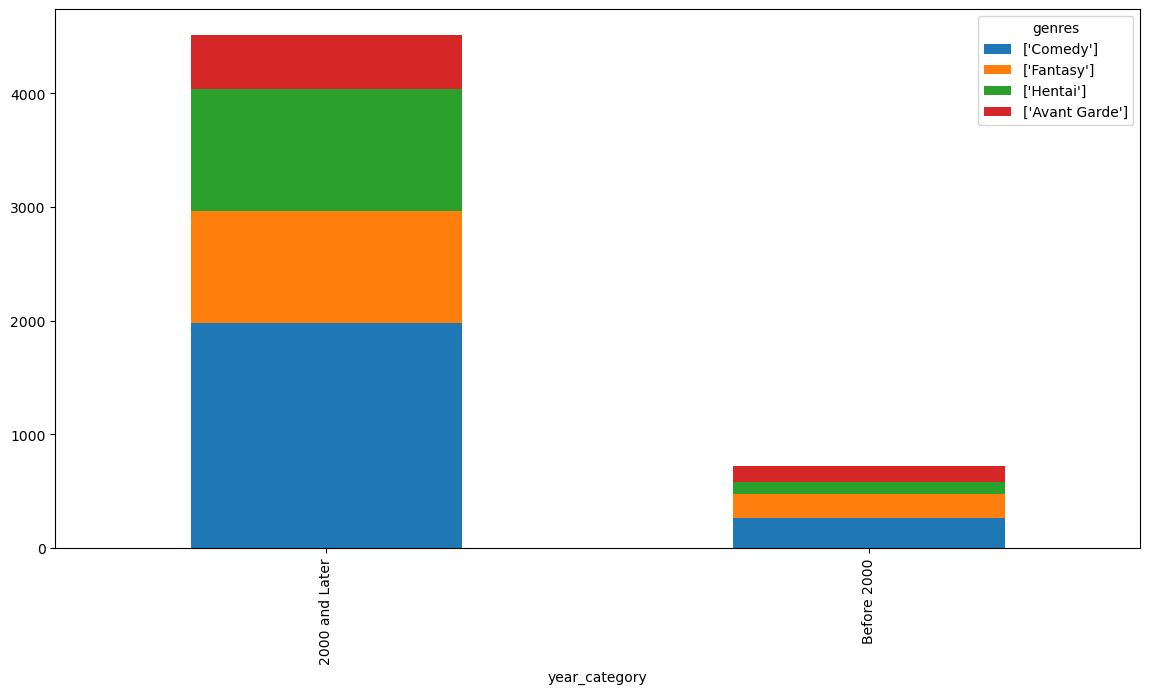

In [251]:
# Visualization 5: Top Plot using the dynamically selected genres
anime_genre_counts = df_cleaned.explode('genres').groupby(['year_category', 'genres']).size().unstack().fillna(0)
top_genres = anime_genre_counts.sum().nlargest(4).index
anime_genre_counts[top_genres].plot(kind='bar', stacked=True, figsize=(14, 7), legend=True)
plt.show()